# Exploratory Data Analysis for School Bus Routing


In [1]:
# Cell 1: Load Data (Points + Time)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ---- Load data directly from a single path ----


school_df = pd.read_csv("/content/School(1).csv")

# Select all columns that contain distances
distance_cols = [col for col in school_df.columns if col.startswith("distance")]
points_df = school_df[distance_cols]


# Select all columns that contain travel times
time_cols = [col for col in school_df.columns if col.startswith("timep")]
times_df= school_df[time_cols]

# Print the shapes of the new DataFrames to check they were created correctly
print("Distance DF shape:", points_df.shape)
print("Time DF shape:", times_df.shape)

points_df .head(), times_df.head()


print("Files loaded successfully.")

school_df


Distance DF shape: (146, 146)
Time DF shape: (146, 146)
Files loaded successfully.


,id,student_name,phone,lat,lon,distance_p1_m,distance_p2_m,distance_p3_m,distance_p4_m,distance_p5_m,...,timep137_s,timep138_s,timep139_s,timep140_s,timep141_s,timep142_s,timep143_s,timep144_s,timep145_s,timep146_s
0,111,مدارس عالم الصغار,573356179,21.570988,39.165134,0,3084,1403,2376,298,...,140,474,480,346,201,268,300,295,376,140
1,112,نورة خالد الحربي,577833072,21.587962,39.166437,2561,0,2189,572,2408,...,434,445,488,428,549,307,435,354,260,489
2,113,ريم عبدالعزيز الدوسري,559457465,21.575823,39.158591,1277,4318,0,2217,1579,...,205,343,349,470,321,349,380,375,425,260
3,114,جود ناصر القحطاني,536837375,21.584457,39.165220,2176,572,1804,0,2023,...,409,420,463,439,524,318,365,315,235,464
4,115,غادة فهد المطيري,568113098,21.571108,39.166971,298,3007,1842,2299,0,...,187,500,506,392,247,295,326,321,403,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,252,جمانة سامي العتيبي,503979890,21.568801,39.171043,1903,4320,3698,3612,1598,...,407,616,594,147,390,0,368,363,445,372
142,253,رهف مازن الشهري,567906889,21.580323,39.174698,3927,2877,2451,2169,4229,...,418,466,472,340,533,340,0,44,354,473
143,254,ميساء عبدالعزيز الحربي,527470966,21.580329,39.174129,3822,2772,2346,2064,4124,...,364,494,419,299,480,295,50,0,309,419
144,255,حلا خالد الغامدي,550150533,21.584550,39.160246,2343,2881,1971,3000,2190,...,430,226,244,444,545,323,355,350,0,485


In [2]:
# Cell 2: Split school vs students + identify key columns

# --- Meta columns that describe each point (only if they exist) ---
possible_meta = ["id", "student_name", "phone", "lat", "lon"]
meta_cols = [c for c in school_df.columns if c in possible_meta]

# --- Distance and time columns already extracted in Cell 1 ---
dist_cols = list(points_df.columns)
time_cols = list(times_df.columns)

# --- Extract school row (row 0) ---
school_points = school_df.iloc[0]   # contains: meta + lat + lon + distance/time values
school_times  = times_df.iloc[0]    # time values for the school

# --- Extract students (rows 1 → end) ---
students_points = school_df.iloc[1:].reset_index(drop=True)
students_times  = times_df.iloc[1:].reset_index(drop=True)

# --- Summary ---
print("Total points (including school):", len(school_df))
print("Students only:", len(students_points))

print("\n=== School Meta Info ===")

# Only display meta columns if they exist
if len(meta_cols) > 0:
    display(school_points[meta_cols])
else:
    print("No meta columns found in file.")


Total points (including school): 146
Students only: 145

=== School Meta Info ===


,0
id,111
student_name,مدارس عالم الصغار
phone,573356179
lat,21.570988
lon,39.165134


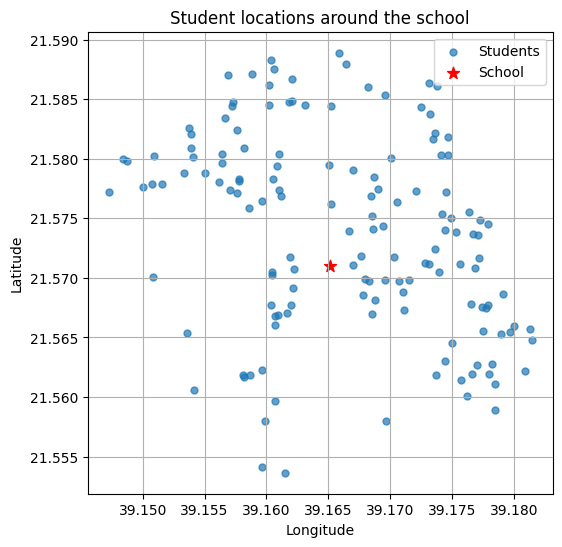

In [3]:
#cell 3

plt.figure(figsize=(6, 6))

# --- Plot students ---
plt.scatter(
    school_df.iloc[1:]["lon"],# longitude values for students
    school_df.iloc[1:]["lat"], # latitude values for students
    s=25,
    alpha=0.7,
    label="Students"
)

# --- Plot school ---
plt.scatter(
    school_df.iloc[0]["lon"],# longitude of the school
    school_df.iloc[0]["lat"],# latitude of the school
    s=80,
    marker="*",
    color="red",
    label="School"
)
# Set labels, title, legend, grid, and display the plot
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Student locations around the school")
plt.legend()
plt.grid(True)
plt.show()


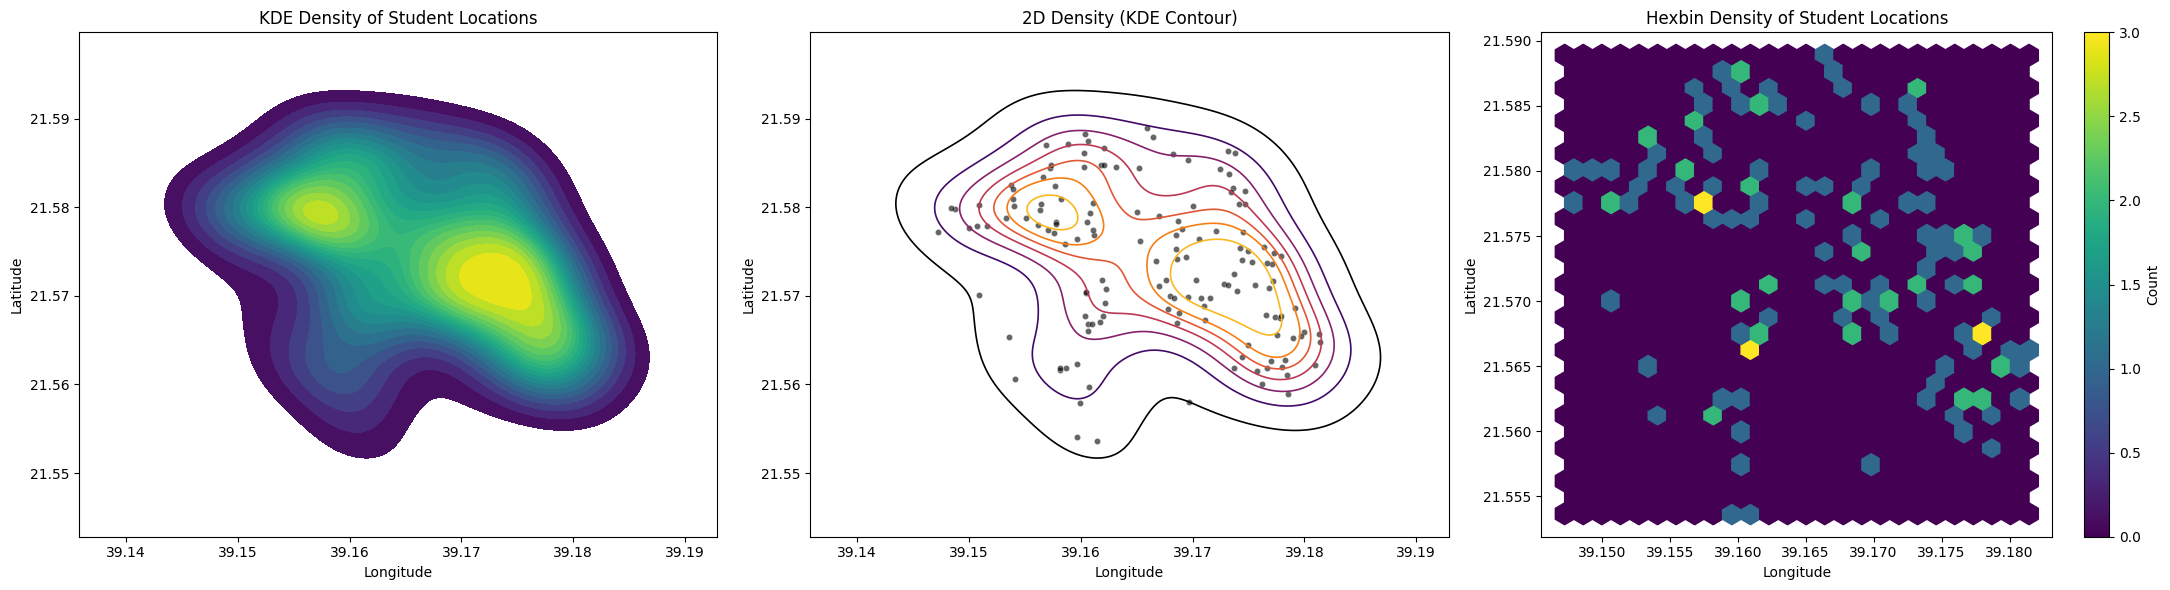

In [4]:
# Cell 4 (Updated): KDE + Contour + Hexbin combined

# Rearranged Density Visualizations (KDE → Contour → Hexbin)
# This cell displays three density-based spatial visualizations
# arranged from left to right: KDE Filled, KDE Contour, Hexbin.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# ----------------------------------------
# 1) KDE Density (Filled)  — Left Plot
# Smooth density visualization showing major hotspot areas
# ----------------------------------------
sns.kdeplot(
    x=school_df.iloc[1:]["lon"],
    y=school_df.iloc[1:]["lat"],
    fill=True,
    cmap="viridis",
    thresh=0.05,
    levels=20,   # Reduced smoothing
    ax=axes[0]
)
axes[0].set_title("KDE Density of Student Locations")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# ----------------------------------------
# 2) KDE Contour (Line density) — Middle Plot
# Shows density levels as contour lines (terrain-style visualization)
# ----------------------------------------
sns.scatterplot(
    x=school_df.iloc[1:]["lon"],
    y=school_df.iloc[1:]["lat"],
    s=20,
    alpha=0.6,
    color="black",
    ax=axes[1]
)

sns.kdeplot(
    x=school_df.iloc[1:]["lon"],
    y=school_df.iloc[1:]["lat"],
    levels=8,       # Fewer contour levels → less smoothing
    cmap="inferno",
    linewidths=1.2,
    ax=axes[1]
)

axes[1].set_title("2D Density (KDE Contour)")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# ----------------------------------------
# 3) Hexbin Density — Right Plot
# Grid-based density visualization showing local student clusters
# ----------------------------------------
hb = axes[2].hexbin(
    school_df.iloc[1:]["lon"],
    school_df.iloc[1:]["lat"],
    gridsize=25,
    cmap="viridis"
)
axes[2].set_title("Hexbin Density of Student Locations")
axes[2].set_xlabel("Longitude")
axes[2].set_ylabel("Latitude")

# Add colorbar for the hexbin plot
fig.colorbar(hb, ax=axes[2], label="Count")

# Final layout adjustments
plt.tight_layout()
plt.show()


In [5]:
# Cell 5: Clean Summary Table for ALL Distance & Time Columns (Side by Side)

import pandas as pd
from IPython.display import display, HTML

# --------------------------------------------
# 1) Identify time & distance columns
# --------------------------------------------
dist_cols = [c for c in points_df.columns if c.startswith("distance_")]
time_cols = [c for c in times_df.columns if c.startswith("time")]

# --------------------------------------------
# 2) Function to compute clean statistics
# --------------------------------------------
def clean_stats(df, cols):
    stats = df[cols].agg(['count', 'mean', 'std', 'min', 'median', 'max'])
    return stats.T

# Compute stats
dist_stats = clean_stats(points_df, dist_cols)
time_stats = clean_stats(times_df, time_cols)

# --------------------------------------------
# 3) Create styled tables
# --------------------------------------------
dist_table = dist_stats.style.background_gradient(cmap="Blues").format("{:.2f}")
time_table = time_stats.style.background_gradient(cmap="Purples").format("{:.2f}")

# --------------------------------------------
# 4) Display side by side
# --------------------------------------------
display(HTML(
    f"""
    <div style="display:flex; gap:40px;">
        <div style="flex:1;">
            <h3>Distance Columns Summary (meters)</h3>
            {dist_table.to_html()}
        </div>
        <div style="flex:1;">
            <h3>Time Columns Summary (seconds)</h3>
            {time_table.to_html()}
        </div>
    </div>
    """
))


,count,mean,std,min,median,max
distance_p1_m,146.00,2446.00,997.03,0.00,2588.00,4488.00
distance_p2_m,146.00,3692.77,1263.87,0.00,3541.00,6477.00
distance_p3_m,146.00,2962.41,1544.65,0.00,2887.50,6474.00
distance_p4_m,146.00,3297.80,1241.84,0.00,3317.00,6192.00
distance_p5_m,146.00,2329.06,980.08,0.00,2337.00,4790.00
distance_p6_m,146.00,3326.55,1686.72,0.00,3040.00,7034.00
distance_p7_m,146.00,2263.14,1139.92,0.00,2039.50,5350.00
distance_p8_m,146.00,2792.50,1143.64,0.00,3073.00,4874.00
distance_p9_m,146.00,3116.38,1462.40,0.00,3140.00,5720.00
distance_p10_m,146.00,3570.12,1700.89,0.00,3291.50,7321.00


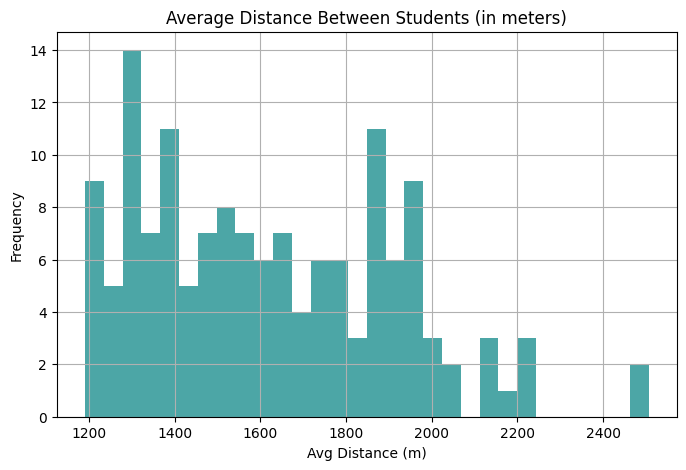

In [6]:
# Cell 6: Compute each student's average distance to all students (REAL DISTANCE in meters)

import numpy as np
import matplotlib.pyplot as plt

# Haversine distance function (returns meters)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Earth radius in meters
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = (np.sin(dlat/2)**2 +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2)**2)
    return 2 * R * np.arcsin(np.sqrt(a))

# Extract coordinates
coords = school_df.iloc[1:][['lat', 'lon']].to_numpy()
N = len(coords)

# Build pairwise distance matrix (in meters)
dist_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(i+1, N):
        d = haversine(coords[i,0], coords[i,1], coords[j,0], coords[j,1])
        dist_matrix[i,j] = d
        dist_matrix[j,i] = d

# Average distance to all students
avg_dist_to_others = dist_matrix.mean(axis=1)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(avg_dist_to_others, bins=30, color="teal", alpha=0.7)
plt.title("Average Distance Between Students (in meters)")
plt.xlabel("Avg Distance (m)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [7]:
# Cell 7: Descriptive Stats for avg_distance & avg_time

import pandas as pd
from IPython.display import display, HTML

# --------------------------------------------
# 1) Identify distance & time columns
# --------------------------------------------
dist_cols = [c for c in points_df.columns if c.startswith("distance_")]
time_cols = [c for c in times_df.columns if c.startswith("time")]

# --------------------------------------------
# 2) Compute per-student averages
# --------------------------------------------
points_df["avg_distance"] = points_df[dist_cols].mean(axis=1)
times_df["avg_time"] = times_df[time_cols].mean(axis=1)

# --------------------------------------------
# 3) Compute descriptive statistics
# --------------------------------------------
dist_desc = points_df["avg_distance"].describe().to_frame()
time_desc = times_df["avg_time"].describe().to_frame()

# --------------------------------------------
# 4) Style the tables
# --------------------------------------------
dist_html = dist_desc.style.format("{:.2f}").background_gradient(cmap="Blues").to_html()
time_html = time_desc.style.format("{:.2f}").background_gradient(cmap="Purples").to_html()

# --------------------------------------------
# 5) Display SIDE BY SIDE
# --------------------------------------------
display(HTML(
    f"""
    <div style="display:flex; gap:60px;">

        <div style="flex:1;">
            <h3>Descriptive Stats: Average Distance (meters)</h3>
            {dist_html}
        </div>

        <div style="flex:1;">
            <h3> Descriptive Stats: Average Time (seconds)</h3>
            {time_html}
        </div>

    </div>
    """
))


/tmp/ipython-input-2926888065.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_df["avg_distance"] = points_df[dist_cols].mean(axis=1)
/tmp/ipython-input-2926888065.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  times_df["avg_time"] = times_df[time_cols].mean(axis=1)


,avg_distance
count,146.00
mean,3067.55
std,531.51
min,2235.13
25%,2671.29
50%,2918.90
75%,3434.38
max,4717.97
,avg_time
count,146.00


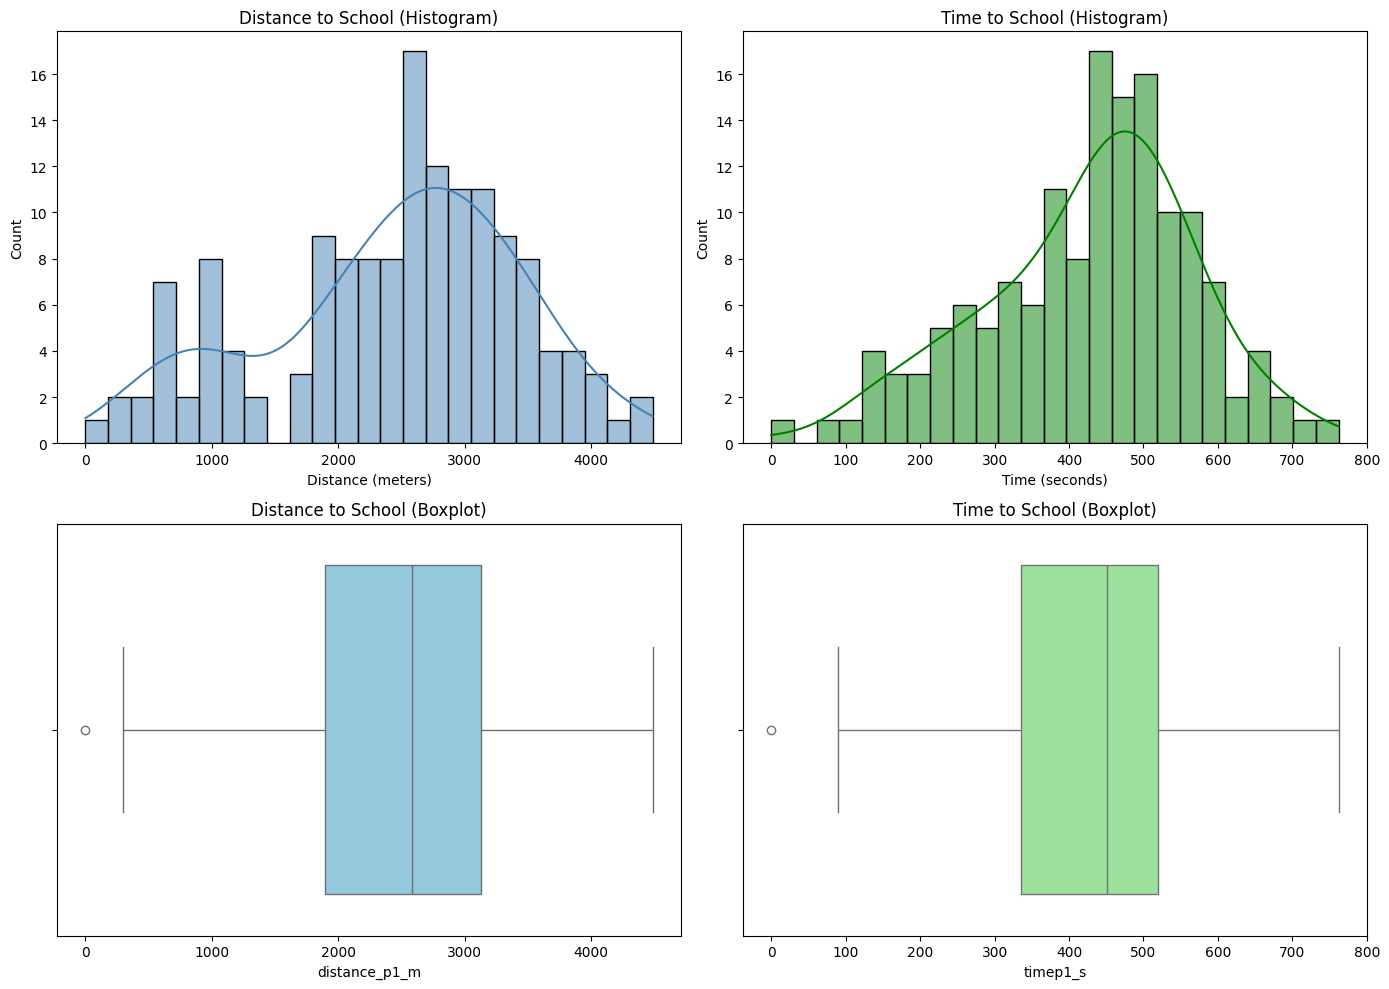

In [8]:
# Cell 8: Distribution of Distance & Time to School

import matplotlib.pyplot as plt
import seaborn as sns

# Select distance and time to school for the first point (p1)
dist_to_school  = points_df["distance_p1_m"]
time_to_school  = times_df["timep1_s"]

# Create a 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Histogram: Distance ---
sns.histplot(dist_to_school, bins=25, kde=True, ax=axes[0,0], color="steelblue")
axes[0,0].set_title("Distance to School (Histogram)")
axes[0,0].set_xlabel("Distance (meters)")

# --- Histogram: Time ---
sns.histplot(time_to_school, bins=25, kde=True, ax=axes[0,1], color="green")
axes[0,1].set_title("Time to School (Histogram)")
axes[0,1].set_xlabel("Time (seconds)")

# --- Boxplot: Distance ---
sns.boxplot(x=dist_to_school, ax=axes[1,0], color="skyblue")
axes[1,0].set_title("Distance to School (Boxplot)")

# --- Boxplot: Time ---
sns.boxplot(x=time_to_school, ax=axes[1,1], color="lightgreen")
axes[1,1].set_title("Time to School (Boxplot)")

plt.tight_layout()
plt.show()


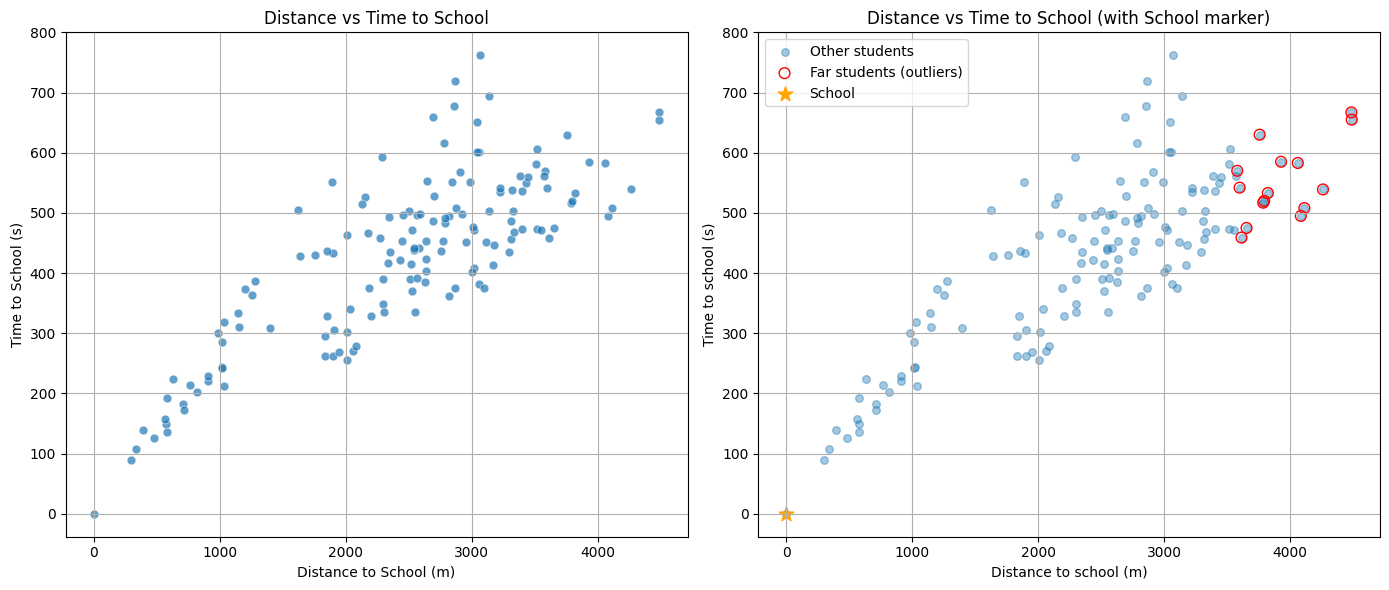

In [9]:
# Cell 9 Combined into One Row (Side-by-Side)
# -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


dist = points_df["distance_p1_m"]
time = times_df["timep1_s"]

# Mark students who live farthest away (top 10% of distances)
far_mask = dist > dist.quantile(0.90)

# Correlation
corr = np.corrcoef(dist, time)[0,1]


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# -------------------------------
# LEFT Plot: Basic scatter of Distance vs Time
# ----------------------------------
sns.scatterplot(
    x=dist,
    y=time,
    alpha=0.7,
    s=40,
    ax=axes[0]
)
axes[0].set_xlabel("Distance to School (m)")
axes[0].set_ylabel("Time to School (s)")
axes[0].set_title(f"Distance vs Time to School")
axes[0].grid(True)

# -------------------------------
# RIGHT Plot: Scatter with School marker and far students highlighted
# -------------------------------
axes[1].scatter(
    dist,
    time,
    s=30,
    alpha=0.4,
    label="Other students"
)

axes[1].scatter(
    dist[far_mask],
    time[far_mask],
    s=60,
    edgecolor="red",
    facecolor="none",
    label="Far students (outliers)"
)

axes[1].scatter(
    0,
    0,
    s=120,
    marker="*",
    color="orange",
    label="School"
)

axes[1].set_xlabel("Distance to school (m)")
axes[1].set_ylabel("Time to school (s)")
axes[1].set_title("Distance vs Time to School (with School marker)")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [10]:
# Cell 10: Distance outliers (very far students)

# 95th percentile threshold
q95 = dist_to_school.quantile(0.95)

# Mask: students with distance >= threshold
far_mask = dist_to_school >= q95

print("Distance threshold (95th percentile):", q95)
print("Number of far students:", far_mask.sum())

# --- Correct meta columns (from school_df) ---
meta_cols = ["id", "student_name", "phone", "lat", "lon"]

# Extract far students info
far_students = school_df.iloc[1:].loc[far_mask, meta_cols + ["distance_p1_m"]]

# Show top 10 farthest
display(far_students.sort_values("distance_p1_m", ascending=False).head(10))


Distance threshold (95th percentile): 3814.75
Number of far students: 8


,id,student_name,phone,lat,lon,distance_p1_m
88,199,حنان محمد الشهراني,536092895,21.586063,39.173807,4488
127,238,نجلاء عبدالعزيز الشهراني,554172747,21.586345,39.173169,4485
113,224,شهد نواف السبيعي,582475116,21.584354,39.172468,4260
129,240,بدور حسين المطيري,597921415,21.583725,39.173233,4112
37,148,أسماء فيصل الزبيدي,598202665,21.562186,39.180951,4084
20,131,ياسمين محمد العسيري,541240484,21.554096,39.159659,4060
142,253,رهف مازن الشهري,567906889,21.580323,39.174698,3927
143,254,ميساء عبدالعزيز الحربي,527470966,21.580329,39.174129,3822


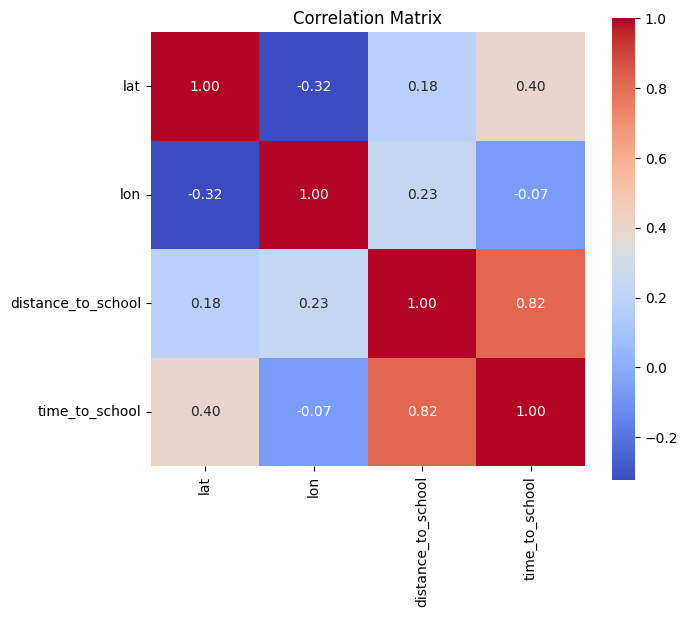

In [11]:
# Cell 11: Correlation Matrix (Heatmap)

import seaborn as sns
import matplotlib.pyplot as plt

# Prepare a dataframe with numeric columns only
corr_df = pd.DataFrame({
    "lat": school_df.iloc[1:]["lat"],
    "lon": school_df.iloc[1:]["lon"],
    "distance_to_school": dist_to_school,
    "time_to_school": time_to_school
})

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)
plt.title("Correlation Matrix")
plt.show()


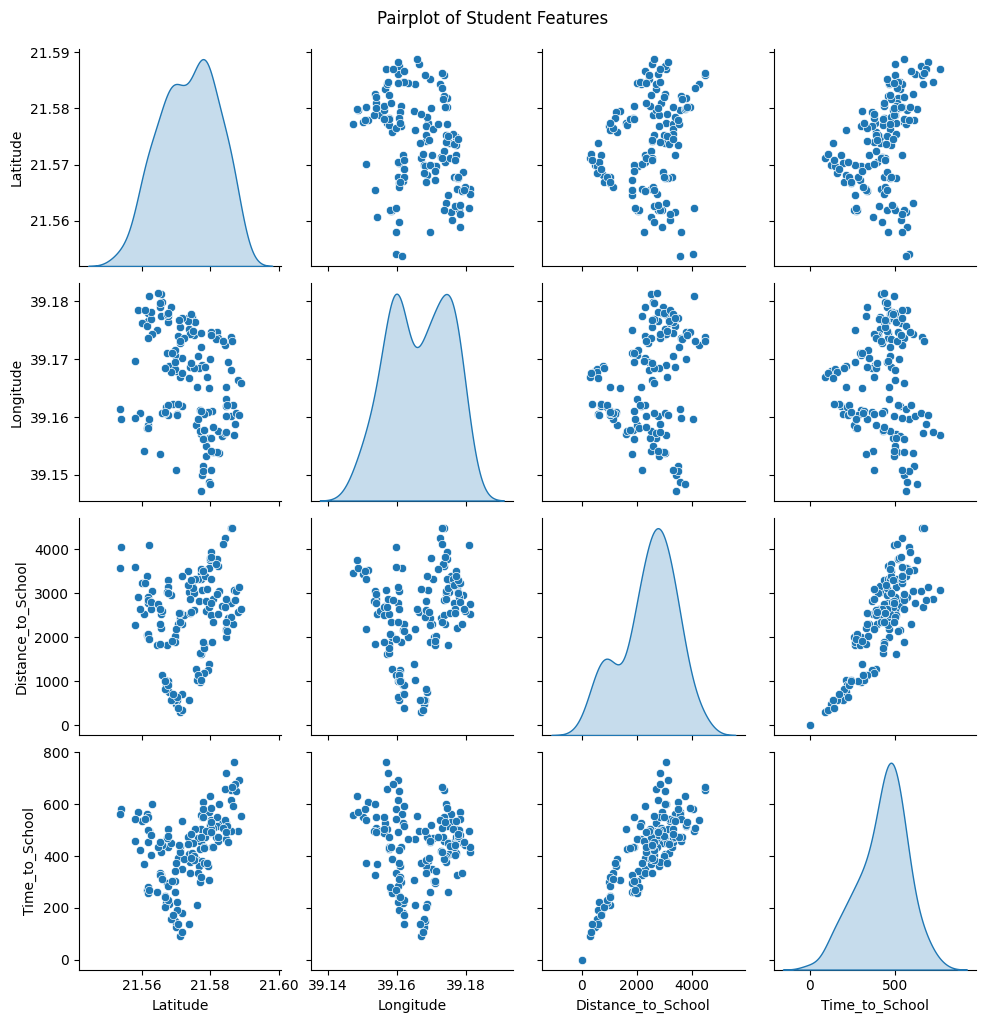

In [12]:
# Cell 12: Pairplot of key features

import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with key features for students (excluding the school)
pair_df = pd.DataFrame({
    "Latitude": school_df.iloc[1:]["lat"],
    "Longitude": school_df.iloc[1:]["lon"],
    "Distance_to_School": dist_to_school,
    "Time_to_School": time_to_school
})
# Plot pairwise relationships between features with KDE on the diagonal
sns.pairplot(pair_df, diag_kind="kde")
plt.suptitle("Pairplot of Student Features", y=1.02)
plt.show()


,Count
Quadrant,
North-East,44
North-West,44
South-East,36
South-West,21


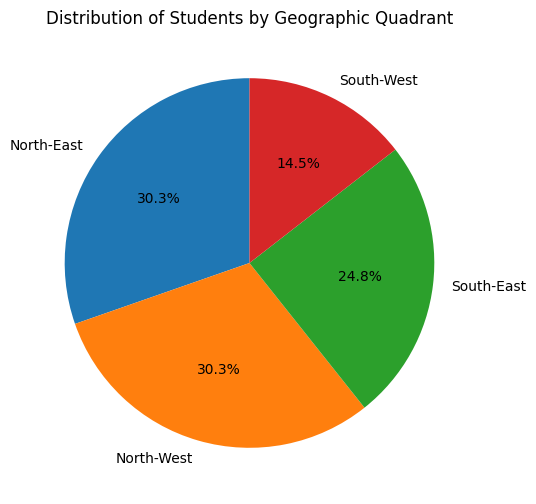

In [13]:
# Cell 13

# ============================================
# Quadrants Analysis (Students around school)
# ============================================

import pandas as pd
import numpy as np

school_lat = school_df.iloc[0]["lat"]
school_lon = school_df.iloc[0]["lon"]

# --------------------------------------------
# Compute relative position for each student
# --------------------------------------------
def get_quadrant(lat, lon):
    if lat >= school_lat and lon >= school_lon:
        return "North-East"
    elif lat >= school_lat and lon < school_lon:
        return "North-West"
    elif lat < school_lat and lon >= school_lon:
        return "South-East"
    else:
        return "South-West"

students_quadrants = school_df.iloc[1:].copy()

students_quadrants["quadrant"] = students_quadrants.apply(
    lambda row: get_quadrant(row["lat"], row["lon"]), axis=1
)

# --------------------------------------------
# Count students per quadrant
# --------------------------------------------
quad_counts = students_quadrants["quadrant"].value_counts().rename_axis("Quadrant").to_frame("Count")

display(quad_counts)

# --------------------------------------------
# Pie Chart (optional – clear and simple)
# --------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(
    quad_counts["Count"],
    labels=quad_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Students by Geographic Quadrant")
plt.show()


# K Mean++

Upload your merged CSV file (lat/lon + distances + times)


Saving School(1).csv to School(1) (3).csv
File loaded 
Total students = 145
Allowed K = [4, 5, 6, 7, 8, 9, 10]

===== Trying K=4 =====
Sizes: [45, 22, 38, 40]
→ Rejected (violates capacity)

===== Trying K=5 =====
Sizes: [19, 24, 39, 22, 41]
Silhouette: 0.4502008029762341
DBI: 0.7495635960036349
CHI: 169.64107345157774

===== Trying K=6 =====
Sizes: [21, 18, 33, 24, 21, 28]
Silhouette: 0.426195631147964
DBI: 0.8062364256892258
CHI: 171.32765611901954

===== Trying K=7 =====
Sizes: [27, 18, 10, 24, 20, 28, 18]
→ Rejected (violates capacity)

===== Trying K=8 =====
Sizes: [19, 30, 24, 13, 18, 15, 17, 9]
→ Rejected (violates capacity)

===== Trying K=9 =====
Sizes: [11, 24, 18, 18, 14, 10, 18, 16, 16]
→ Rejected (violates capacity)

===== Trying K=10 =====
Sizes: [17, 23, 10, 17, 12, 11, 13, 16, 13, 13]
→ Rejected (violates capacity)

==================== RANK TABLE ====================

   K       sil         chi       dbi  \
0  5  0.450201  169.641073  0.749564   
1  6  0.426196  171.32

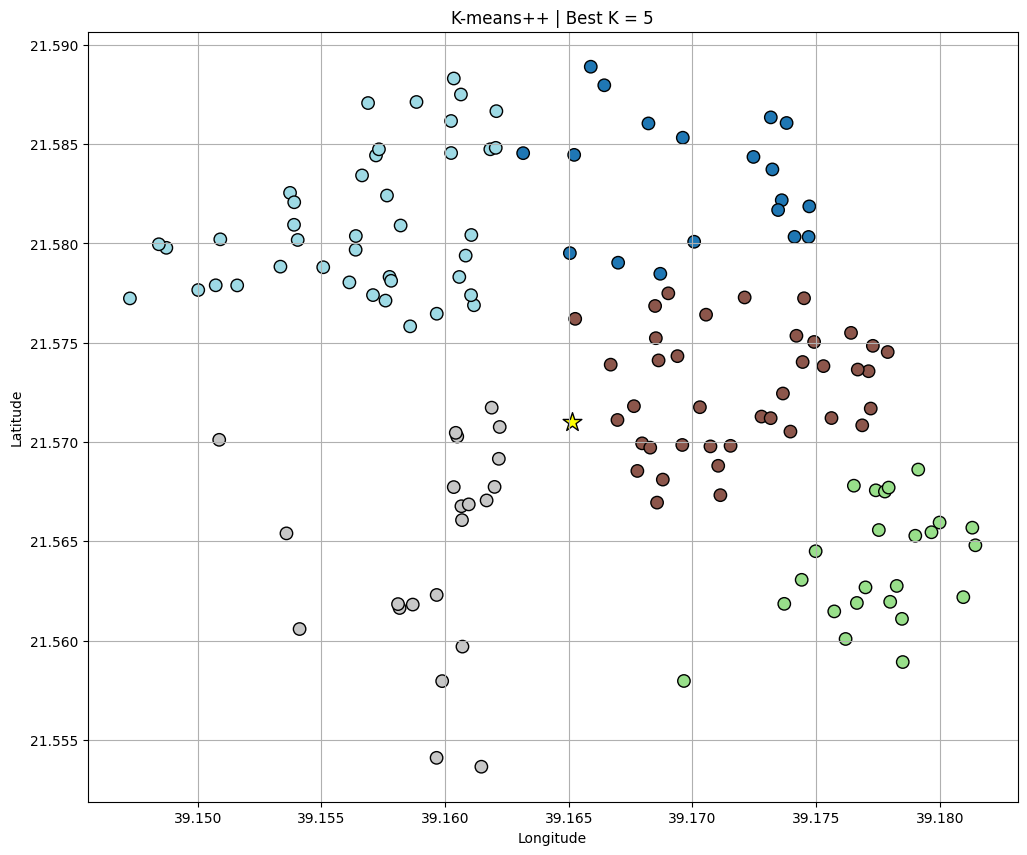

In [14]:
# ============================================================
# 0) IMPORTS
# ============================================================
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from math import ceil, floor
from google.colab import files

# ============================================================
# 1) LOAD DATA (UPLOAD ONE FILE ONLY)
# ============================================================
print("Upload your merged CSV file (lat/lon + distances + times)")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
print("File loaded ")

# ============================================================
# 2) USE ALL STUDENTS DIRECTLY (REMOVED INPUT)
# ============================================================
df_students = df.iloc[1:].reset_index(drop=True)   # skip school at index 0

N = len(df_students)
coords = df_students[["lat","lon"]].values

print("Total students =", N)

# ============================================================
# 3) NORMALIZATION
# ============================================================
scaler = StandardScaler()
coords_norm = scaler.fit_transform(coords)

# ============================================================
# 4) CAPACITY RULES (NO CHANGES)
# ============================================================
min_cap = 14
max_cap = 44

k_min = ceil(N / max_cap)
k_max = floor(N / min_cap)

possible_K = list(range(k_min, k_max+1))

if N < 28:
    possible_K = [1]
elif N == 28:
    possible_K = [2]
else:
    possible_K = [k for k in possible_K if k >= 2]

print("Allowed K =", possible_K)

# ============================================================
# 5) CLUSTERING TRIALS
# ============================================================
results = { "K":[], "sil":[], "chi":[], "dbi":[], "labels":[] }

for k in possible_K:
    print(f"\n===== Trying K={k} =====")

    km = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=300,
        max_iter=700,
        random_state=42
    )

    labels = km.fit_predict(coords_norm)
    sizes = np.bincount(labels, minlength=k)

    print("Sizes:", sizes.tolist())

    # === FCM rules ===
    if k == 2:
        ratio = min(sizes) / max(sizes)
        if ratio < 0.6:
            print(f"→ Rejected (ratio={ratio:.2f})")
            continue
    else:
        if (sizes < min_cap).any() or (sizes > max_cap).any():
            print("→ Rejected (violates capacity)")
            continue

    # === Metrics ===
    sil = silhouette_score(coords_norm, labels)
    dbi = davies_bouldin_score(coords_norm, labels)
    chi = calinski_harabasz_score(coords_norm, labels)

    print("Silhouette:", sil)
    print("DBI:", dbi)
    print("CHI:", chi)

    results["K"].append(k)
    results["sil"].append(sil)
    results["chi"].append(chi)
    results["dbi"].append(dbi)
    results["labels"].append(labels)

# ============================================================
# 6) RANKING TABLE
# ============================================================
rank_df = pd.DataFrame(results)

rank_df["Silhouette Rank"] = rank_df["sil"].rank(ascending=False)
rank_df["CH Rank"] = rank_df["chi"].rank(ascending=False)
rank_df["DBI Rank"] = rank_df["dbi"].rank(ascending=True)

rank_df["Internal Avg Rank"] = (
    rank_df["Silhouette Rank"] +
    rank_df["CH Rank"] +
    rank_df["DBI Rank"]
) / 3

rank_df["Final Rank"] = rank_df["Internal Avg Rank"].rank(ascending=True)
rank_df = rank_df.sort_values("Final Rank")

print("\n==================== RANK TABLE ====================\n")
print(rank_df)
print("\n====================================================\n")

# ============================================================
# 7) SELECT BEST K + CREATE df_clusters
# ============================================================
best_row = rank_df.iloc[0]
best_k = int(best_row["K"])
best_labels = best_row["labels"]

df_clusters = df_students.copy()
df_clusters["cluster_ai"] = best_labels

print(f"\nBest K = {best_k}")
print("Best Silhouette =", best_row["sil"])
print("Best CHI =", best_row["chi"])
print("Best DBI =", best_row["dbi"])
print("\ndf_clusters created ")

# ============================================================
# 8) PLOT (OPTIONAL)
# ============================================================
plt.figure(figsize=(12,10))
plt.scatter(coords[:,1], coords[:,0], c=best_labels, cmap="tab20", s=80, edgecolor="black")
plt.scatter(df.iloc[0]["lon"], df.iloc[0]["lat"], s=200, c="yellow", marker="*", edgecolor="black")
plt.title(f"K-means++ | Best K = {best_k}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


# Nearest Neighbor + ALNS + OPT

In [16]:
import numpy as np        #"Cluster"
import pandas as pd
import random
import math

# ---------------------------
# 0) Prepare distance and time matrices
# ---------------------------


dist_cols = [c for c in df.columns if "distance" in c.lower()]
time_cols = [c for c in df.columns if "time" in c.lower()]

distance_matrix = df[dist_cols].to_numpy(dtype=float)
time_matrix     = df[time_cols].to_numpy(dtype=float)


# ============================================================
# 1) USE CLUSTERS FROM df_clusters
# ============================================================

df_students = df_clusters.copy()
cluster_ids = df_students["cluster_ai"].to_numpy()

"""
df_students = df_present.copy()
cluster_ids = df_students["cluster_ai"].to_numpy()"""

# ============================================================
# 2) BUILD MATRICES
# ============================================================


SCHOOL_NODE = 0                     # Index of the school node
STOP_TIME = 60                       # Time spent at each stop (seconds)
MAX_STUDENT_TIME = 90 * 60           # Max student trip time
PENALTY_FACTOR = 10000.0             # Large penalty for exceeding max student time
ALPHA = 0.3                           # Time weight
BETA  = 0.7                            # Dist weight


# ============================================================
# 3) COST FUNCTIONS (Hybrid (dist and time))
# ============================================================
# Compute travel time along a route

def route_travel_time(route):
    return sum(time_matrix[route[i]][route[i+1]] for i in range(len(route)-1))

# Compute total route cost considering travel time + stop time
def route_cost(route):
    travel = route_travel_time(route)
    inner_students = len(route) - 2
    stops = inner_students * STOP_TIME
    return travel + stops

# Compute hybrid cost combining distance and time

def hybrid_cost(route):

    travel_time = sum(time_matrix[route[i]][route[i+1]] for i in range(len(route)-1))


    travel_dist = sum(distance_matrix[route[i]][route[i+1]] for i in range(len(route)-1))


    inner_students = len(route) - 2
    stops = inner_students * STOP_TIME


    return ALPHA * (travel_time + stops) + BETA * travel_dist



#calculate route ditsance
raw_distance_matrix = df[dist_cols].to_numpy(dtype=float).copy()

def route_total_distance(route):
    total = 0
    for i in range(len(route)-1):
        total += raw_distance_matrix[route[i]][route[i+1]]
    return total

# ============================================================
# X) 2-OPT LOCAL SEARCH
# After ALNS finishes, 2-opt is applied to locally optimize the route shape.
# This step improves final solution
# ============================================================

def two_opt(route, cost_func):
    best = route.copy()
    best_cost = cost_func(best)
    improved = True

    while improved:
        improved = False
        for i in range(1, len(best) - 2):
            for j in range(i + 1, len(best) - 1):
                new_route = best[:i] + best[i:j+1][::-1] + best[j+1:]
                new_cost = cost_func(new_route)

                if new_cost < best_cost:
                    best = new_route
                    best_cost = new_cost
                    improved = True
                    break
            if improved:
                break

    return best


# ============================================================
# 4) INITIAL ROUTES (Morning / Afternoon)
# ============================================================

def initial_route_morning(student_nodes):
    unvisited = set(int(s) for s in student_nodes)
    if not unvisited:
        return [SCHOOL_NODE, SCHOOL_NODE]

    route = [SCHOOL_NODE]
    curr = SCHOOL_NODE


    while unvisited:
        nxt = min(unvisited, key=lambda j: distance_matrix[curr][j])
        route.append(nxt)
        unvisited.remove(nxt)
        curr = nxt

    route.append(SCHOOL_NODE)
    return route




def initial_route_afternoon(student_nodes):
    unvisited = set(int(s) for s in student_nodes)
    if not unvisited:
        return [SCHOOL_NODE, SCHOOL_NODE]

    route = [SCHOOL_NODE]
    curr = SCHOOL_NODE


    while unvisited:
        nxt = min(unvisited, key=lambda j: distance_matrix[curr][j])
        route.append(nxt)
        unvisited.remove(nxt)
        curr = nxt

    route.append(SCHOOL_NODE)
    return route



# ---------------------------
# 6) Destroy operators (for ALNS)
# ---------------------------
# Remove nodes from a route to allow adaptive re-insertion
# These are used to explore the search space and escape local optima

# Randomly remove a portion of nodes

def random_remove(route, percent=0.15):
    r = route.copy()
    inner = r[1:-1]
    if len(inner) == 0:
        return r, []
    k = max(1, int(len(inner) * percent))
    removed = random.sample(inner, k)
    for x in removed:
        r.remove(x)
    return r, removed

# Remove nodes that contribute most to route cost
def worst_remove(route, k=7):
    r = route.copy()
    inner = r[1:-1]
    if len(inner) <= 1:
        return r, []

    k = min(k, len(inner))
    scores = []

    for i in range(1, len(r)-1):
        b = r[i-1]
        n = r[i]
        a = r[i+1]


        inc_time = (
            time_matrix[b][n] +
            time_matrix[n][a] -
            time_matrix[b][a]
        )


        inc_dist = (
            distance_matrix[b][n] +
            distance_matrix[n][a] -
            distance_matrix[b][a]
        )


        inc = ALPHA * inc_time + BETA * inc_dist

        scores.append((inc, n))

    scores.sort(reverse=True)
    removed = [n for _, n in scores[:k]]

    for n in removed:
        r.remove(n)

    return r, removed
# Remove nodes similar to a randomly selected seed node
def shaw_remove(route, k=3, gamma=0.3):
    r = route.copy()
    inner = r[1:-1]
    if not inner:
        return r, []

    k = min(k, len(inner))
    seed = random.choice(inner)
    removed = {seed}

    sc = []
    for n in inner:
        if n == seed:
            continue


        sim_time = time_matrix[seed][n]


        sim_dist = distance_matrix[seed][n]


        rel = gamma * sim_time + (1 - gamma) * sim_dist

        sc.append((rel, n))

    sc.sort(key=lambda x: x[0])

    for _, n in sc:
        if len(removed) >= k:
            break
        removed.add(n)

    for x in removed:
        r.remove(x)

    return r, list(removed)


# ============================================================
# 6) REPAIR (Regret-2 Operator )
# Inserts removed nodes back into the route by considering both the best insertion
# position and the second-best one. The Regret value = (second_best_cost - best_cost)
# encourages inserting nodes where delaying insertion would be expensive.
# ============================================================

def regret_2_insert(route, removed):
    r = route.copy()
    removed = removed.copy()

    while removed:
        best_node = None
        best_pos = None
        best_regret = -1

        for node in removed:
            incs = []
            for i in range(1, len(r)):
                b = r[i-1]
                a = r[i]


                inc_time = (
                    time_matrix[b][node] +
                    time_matrix[node][a] -
                    time_matrix[b][a]
                )


                inc_dist = (
                    distance_matrix[b][node] +
                    distance_matrix[node][a] -
                    distance_matrix[b][a]
                )

                # hybrid increment
                inc = ALPHA * inc_time + BETA * inc_dist

                incs.append((inc, i))

            incs.sort(key=lambda x: x[0])
            best_inc = incs[0][0]
            best_idx = incs[0][1]
            second_inc = incs[1][0] if len(incs) > 1 else best_inc

            regret = second_inc - best_inc

            if regret > best_regret:
                best_regret = regret
                best_node = node
                best_pos = best_idx

        r.insert(best_pos, best_node)
        removed.remove(best_node)

    return r



# ============================================================
# 7) STUDENT TIME + CONSTRAINTS
# ============================================================

def route_time(route):
    travel = route_travel_time(route)
    inner = len(route) - 2
    stops = inner * STOP_TIME
    return travel + stops

# Trip time for morning (students going to school)
def student_trip_time_morning(route):
    inner = route[1:-1]
    if not inner:
        return 0

    travel = sum(time_matrix[route[i]][route[i+1]] for i in range(1, len(route)-1))
    stops = len(inner) * STOP_TIME
    return travel + stops

# Trip time for afternoon (students going home)
def student_trip_time_afternoon(route):
    inner = route[1:-1]
    if not inner:
        return 0

    travel = sum(time_matrix[route[i]][route[i+1]] for i in range(0, len(route)-2))
    stops = len(inner) * STOP_TIME
    return travel + stops

# Constrained cost with penalty for exceeding max student time
def constrained_cost_morning(route):
    base = hybrid_cost(route)
    max_t = student_trip_time_morning(route)

    if max_t <= MAX_STUDENT_TIME:
        return base

    excess_min = (max_t - MAX_STUDENT_TIME) / 60.0
    penalty = PENALTY_FACTOR * (1.0 + excess_min)
    return base + penalty

def constrained_cost_afternoon(route):
    base = hybrid_cost(route)
    max_t = student_trip_time_afternoon(route)

    if max_t <= MAX_STUDENT_TIME:
        return base

    excess_min = (max_t - MAX_STUDENT_TIME) / 60.0
    penalty = PENALTY_FACTOR * (1.0 + excess_min)
    return base + penalty



# ============================================================
# 8) ACCEPTANCE (Simulated Annealing)
# Accepts worse solutions with probability depending on temperature T.
# This prevents ALNS from getting stuck in local minima early.
# ============================================================

def accept(new, old, T):
    if new < old:
        return True
    return random.random() < math.exp(-(new - old) / T)


# ============================================================
# 9) ALNS CORE  (Morning / Afternoon)
# ============================================================

def alns_for_cluster_morning(student_nodes,
                             iterations=12000, T0=850,
                             cooling=0.9999):

    # 1) Construct Initial Solution (Nearest-Neighbor)
    route = initial_route_morning(student_nodes)
    best = route.copy()
    best_cost = constrained_cost_morning(best)

    # 2) Define Destroy Operators and Their Initial Weights
    # Each operator starts with equal weight and will be updated based
    # on performance (adaptive learning)

    ops = [random_remove, worst_remove, shaw_remove]
    weights = [1.0, 1.0, 1.0]

    # Score + usage counters for adaptive weight updates

    op_scores = [0.0, 0.0, 0.0]
    op_usage  = [0.0, 0.0, 0.0]

    rho = 0.8             # Learning rate for weight updates
    update_every = 200    #Update frequency for operator weights

    T = T0                #Simulated annealing starting temperature

     # 3) Operator Selection Function (Roulette Wheel)
    def select_op():
        tot = sum(weights)
        probs = [w / tot for w in weights]

        cumulative = []
        c = 0
        for p in probs:
            c += p
            cumulative.append(c)

        r = random.random()

        for i, cp in enumerate(cumulative):
            if r <= cp:
                return i

        return len(weights)-1

#4) Main ALNS Iteration Loop
    # Each iteration performs the following:
    #   1) Select a destroy operator
    #   2) Destroy part of the route
    #   3) Repair using Regret-2 insertion
    #   4) Evaluate new cost
    #   5) Score the operator based on performance
    #   6) Accept or reject using SA acceptance rule
    #   7) Update global best solution
    #   8) Every 200 iterations, update operator weights

    for it in range(1, iterations+1):
        #select an operator
        idx = select_op()
        partial, rem = ops[idx](route)

        if not rem:
            continue

        new = regret_2_insert(partial, rem)

        nc = constrained_cost_morning(new)
        oc = constrained_cost_morning(route)

        if nc < best_cost:
           op_scores[idx] += 6
           op_usage[idx]  += 1

        # 2) Better than CURRENT but not GLOBAL best
        elif nc < oc:
            op_scores[idx] += 3
            op_usage[idx]  += 1

        # 3) Equal to CURRENT
        elif nc == oc:
            op_scores[idx] += 1
            op_usage[idx]  += 1

       # 4) Worse than CURRENT
        else:
            op_scores[idx] += 0
            op_usage[idx]  += 1

        #accept solution based on SA algorithm
        if accept(nc, oc, T):
            route = new.copy()
            if nc < best_cost:
                best = new.copy()
                best_cost = nc

        #updating weights based on it performane
        if it % update_every == 0:
            for k in range(len(weights)):
                if op_usage[k] > 0:
                    avg = op_scores[k] / op_usage[k]
                else:
                    avg = 0
                weights[k] = (1-rho) * weights[k] + rho * avg

            op_scores = [0.0, 0.0, 0.0]
            op_usage  = [0.0, 0.0, 0.0]

        T = T * cooling

    #send final ALNS route to OPT
    best_2 = two_opt(best, route_time)
    best_2_cost = constrained_cost_morning(best_2)

    if best_2_cost < best_cost:
        best, best_cost = best_2, best_2_cost


    return best, best_cost



def alns_for_cluster_afternoon(student_nodes,
                               iterations=12000, T0=850,
                               cooling=0.9999):

    # 1) Construct Initial Solution (Nearest-Neighbor)

    route = initial_route_afternoon(student_nodes)
    best = route.copy()
    best_cost = constrained_cost_afternoon(best)

    # 2) Define Destroy Operators and Their Initial Weights
    # Each operator starts with equal weight and will be updated based
    # on performance (adaptive learning)

    ops = [random_remove, worst_remove, shaw_remove]
    weights = [1.0, 1.0, 1.0]


    # Score + usage counters for adaptive weight updates
    op_scores = [0.0, 0.0, 0.0]
    op_usage  = [0.0, 0.0, 0.0]

    rho = 0.8             # Learning rate for weight updates
    update_every = 200    #Update frequency for operator weights

    T = T0                #Simulated annealing starting temperature

    # 3) Operator Selection Function (Roulette Wheel)
    def select_op():
        tot = sum(weights)
        probs = [w / tot for w in weights]

        cumulative = []
        c = 0
        for p in probs:
            c += p
            cumulative.append(c)

        r = random.random()

        for i, cp in enumerate(cumulative):
            if r <= cp:
                return i

        return len(weights)-1

    #4) Main ALNS Iteration Loop
    # Each iteration performs the following:
    #   1) Select a destroy operator
    #   2) Destroy part of the route
    #   3) Repair using Regret-2 insertion
    #   4) Evaluate new cost
    #   5) Score the operator based on performance
    #   6) Accept or reject using SA acceptance rule
    #   7) Update global best solution
    #   8) Every 200 iterations, update operator weights

    for it in range(1, iterations+1):

        idx = select_op()
        partial, rem = ops[idx](route)

        if not rem:
            continue

        new = regret_2_insert(partial, rem)

        nc = constrained_cost_afternoon(new)
        oc = constrained_cost_afternoon(route)

        # 1) New GLOBAL BEST
        if nc < best_cost:
           op_scores[idx] += 6
           op_usage[idx]  += 1

        # 2) Better than CURRENT but not GLOBAL best
        elif nc < oc:
            op_scores[idx] += 3
            op_usage[idx]  += 1

        # 3) Equal to CURRENT
        elif nc == oc:
            op_scores[idx] += 1
            op_usage[idx]  += 1

       # 4) Worse than CURRENT
        else:
            op_scores[idx] += 0
            op_usage[idx]  += 1

        #accept solution based on SA algorithm
        if accept(nc, oc, T):
            route = new.copy()
            if nc < best_cost:
                best = new.copy()
                best_cost = nc
        #update weight every 200 iterations
        if it % update_every == 0:
            for k in range(len(weights)):
                if op_usage[k] > 0:
                    avg = op_scores[k] / op_usage[k]
                else:
                    avg = 0
                weights[k] = (1 - rho) * weights[k] + rho * avg

            op_scores = [0.0, 0.0, 0.0]
            op_usage  = [0.0, 0.0, 0.0]


        T =  T * cooling

    #send final ALNS route to OPT
    best_2 = two_opt(best, route_time)
    best_2_cost = constrained_cost_afternoon(best_2)

    if best_2_cost < best_cost:
        best, best_cost = best_2, best_2_cost



    return best, best_cost



# ============================================================
# 10) RUN FOR ALL CLUSTERS + PRINT Routes
# ============================================================

unique_clusters = sorted(c for c in np.unique(cluster_ids) if c != -1)
results = {}

for cid in unique_clusters:

    local_idx = df_students.index[df_students["cluster_ai"] == cid].to_numpy()
    student_nodes = (local_idx + 1).astype(int)

    print("\n==================================================")
    print(f"BUS / CLUSTER {cid}  |  STUDENTS: {len(student_nodes)}")
    print("==================================================")

     #  Morning ALNS
    best_morning_route, best_morning_cost = alns_for_cluster_morning(student_nodes)

    morning_total = route_time(best_morning_route)
    morning_students_time = student_trip_time_morning(best_morning_route)

    print("\n MORNING ROUTE:")
    print("Route:", best_morning_route)
    print("Bus Total Time (min):", morning_total / 60)
    print("Student Trip Time (min):", morning_students_time / 60)
    morning_distance = route_total_distance(best_morning_route)
    print("Bus Total Distance (meters):", morning_distance)
    print("Bus Total Distance (km):", morning_distance / 1000)

    if morning_students_time <= MAX_STUDENT_TIME:
        print(" Morning student trip time is within 90 minutes.")
    else:
        print(" Morning student trip time EXCEEDS 90 minutes!")

    #  Afternoon ALNS
    best_afternoon_route, best_afternoon_cost = alns_for_cluster_afternoon(student_nodes)

    afternoon_total = route_time(best_afternoon_route)
    afternoon_students_time = student_trip_time_afternoon(best_afternoon_route)

    print("\n AFTERNOON ROUTE :")
    print("Route:", best_afternoon_route)
    print("Bus Total Time (min):", afternoon_total / 60)
    print("Student Trip Time (min):", afternoon_students_time / 60)
    afternoon_distance = route_total_distance(best_afternoon_route)
    print("Bus Total Distance (meters):", afternoon_distance)
    print("Bus Total Distance (km):", afternoon_distance / 1000)

    if afternoon_students_time <= MAX_STUDENT_TIME:
        print(" Afternoon student trip time is within 90 minutes.")
    else:
        print(" Afternoon student trip time EXCEEDS 90 minutes!")

    results[cid] = {
        "morning_route": best_morning_route,
        "afternoon_route": best_afternoon_route,
        "morning_bus_time_s": morning_total,
        "afternoon_bus_time_s": afternoon_total,
        "morning_students_time_s": morning_students_time,
        "afternoon_students_time_s": afternoon_students_time
}



BUS / CLUSTER 0  |  STUDENTS: 19

 MORNING ROUTE:
Route: [0, 125, 70, 142, 143, 28, 67, 69, 50, 129, 113, 88, 127, 46, 110, 1, 124, 3, 13, 26, 0]
Bus Total Time (min): 65.61666666666666
Student Trip Time (min): 62.266666666666666
Bus Total Distance (meters): 11841.0
Bus Total Distance (km): 11.841
 Morning student trip time is within 90 minutes.

 AFTERNOON ROUTE :
Route: [0, 125, 70, 142, 143, 28, 67, 69, 50, 129, 113, 88, 127, 46, 110, 1, 124, 3, 13, 26, 0]
Bus Total Time (min): 65.61666666666666
Student Trip Time (min): 60.483333333333334
Bus Total Distance (meters): 11841.0
Bus Total Distance (km): 11.841
 Afternoon student trip time is within 90 minutes.

BUS / CLUSTER 1  |  STUDENTS: 24

 MORNING ROUTE:
Route: [0, 56, 43, 21, 16, 108, 52, 10, 57, 61, 64, 93, 66, 8, 81, 37, 34, 78, 18, 38, 58, 91, 48, 30, 22, 0]
Bus Total Time (min): 77.95
Student Trip Time (min): 73.21666666666667
Bus Total Distance (meters): 15400.0
Bus Total Distance (km): 15.4
 Morning student trip time is wi

# ETA Of Students

In [17]:
import pandas as pd  # CODE "ETA" OF STUDENT
import numpy as np

# ==============================
# 1) Global parameters
# ==============================
SPEED_KMH = 38.0 # average school bus speed (km/h) 70%=35km , 20%=50km , 10%=80km
STOP_TIME = 1      # 1 minute stop at each student's home

# Convert distance (meters) to travel time (minutes)
def dist_to_minutes(dist_meters, speed_kmh=SPEED_KMH):
    """
    Convert distance (meters) into travel time (minutes)
    using a fixed average bus speed.
    """
    dist_km = dist_meters / 1000.0
    time_hours = dist_km / speed_kmh
    time_minutes = time_hours * 60.0
    return time_minutes

# ------------------------------
# Compute ETA for each student in a route
# ------------------------------

def compute_student_etas_distance(route, distance_matrix):
    """
    Compute ETA for each student in the route.
    Returns dictionary {node_index: (ETA, order_in_route)}.
    """
    etas = {}
    cumulative = 0.0

    for i in range(1, len(route) - 1):

        a = route[i - 1]
        b = route[i]

        dist_m = distance_matrix[a][b]
        seg_time = dist_to_minutes(dist_m)

        cumulative += seg_time
        eta = cumulative + (i * STOP_TIME)

        etas[b] = (round(eta, 2), i)

    return etas

# ------------------------------
# Build a final ETA DataFrame for all routes
# ------------------------------

def build_eta_dataframe_with_distance(results, df_students, distance_matrix):
    """
    Build ETA dataframe for morning and afternoon routes.
    Includes ETA + ORDER column.
    """
    all_rows = [] #list of dictionay

    for cid in results.keys():

        # ===== MORNING FIRST =====
        morning_route = results[cid]["morning_route"]
        morning_etas = compute_student_etas_distance(morning_route, distance_matrix)# the value is dectionary

        for node, (eta, order) in morning_etas.items():
            row = df_students[df_students["node_index"] == node].iloc[0]

            all_rows.append({
                "bus_id": cid,
                "trip_type": "morning",
                "order_in_route": order,
                "student_id": row["id"],
                "student_name": row["student_name"],
                "node_index": int(node),
                "eta_minutes": eta,
                "phone": str(row["phone"])
            })


        # ===== AFTERNOON SECOND =====
        afternoon_route = results[cid]["afternoon_route"]
        afternoon_etas = compute_student_etas_distance(afternoon_route, distance_matrix)

        for node, (eta, order) in afternoon_etas.items():
            row = df_students[df_students["node_index"] == node].iloc[0]

            all_rows.append({
                "bus_id": cid,
                "trip_type": "afternoon",
                "order_in_route": order,
               "student_id": row["id"],
                "student_name": row["student_name"],
                "node_index": int(node),
                "eta_minutes": eta,
                "phone": str(row["phone"])
            })


    df_eta = pd.DataFrame(all_rows)

    # ===== ORDER trip_type (morning → afternoon) =====
    df_eta["trip_type"] = pd.Categorical(
        df_eta["trip_type"],
        categories=["morning", "afternoon"],
        ordered=True
    )

    # ===== FINAL SORTING =====
    df_eta = df_eta.sort_values(
        by=["bus_id", "trip_type", "order_in_route"]
    ).reset_index(drop=True)

    return df_eta


# ==============================
# RUN + CLEAN DISPLAY
# ==============================
# ===== IMPORTANT FIX =====
df_students = df_students.reset_index(drop=True)
df_students["node_index"] = df_students.index + 1


df_eta = build_eta_dataframe_with_distance(results, df_students, distance_matrix)

df_eta


,bus_id,trip_type,order_in_route,student_id,student_name,node_index,eta_minutes,phone
0,0,morning,1,236,لمى خالد الحربي,125,3.23,527427862
1,0,morning,2,181,مها عبدالله البقمي,70,4.88,576677779
2,0,morning,3,253,رهف مازن الشهري,142,7.04,567906889
3,0,morning,4,254,ميساء عبدالعزيز الحربي,143,8.20,527470966
4,0,morning,5,139,ريم فيصل الدوسري,28,9.55,569857765
...,...,...,...,...,...,...,...,...
285,4,afternoon,37,220,بشاير ناصر العتيبي,109,55.71,577065750
286,4,afternoon,38,171,غيداء ماجد الحربي,60,57.26,528876422
287,4,afternoon,39,226,كادي فهد الغامدي,115,58.30,590581204
288,4,afternoon,40,255,حلا خالد الغامدي,144,59.85,550150533


#Notification code

In [18]:
!pip install twilio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.3 MB/s eta 0:00:00


In [19]:
from twilio.rest import Client # THIS CODE HAVE SAMPLE (5 STUDENT)
import pandas as pd
from datetime import datetime

# ---------------------------------------
# Twilio Credentials
# ---------------------------------------
account_sid = "ACf832384cfc188313746de900d6a19527"
auth_token = "daf3bd9c8c1172dd8f162393af8a8c9b"
client = Client(account_sid, auth_token)

# ---------------------------------------
# df_eta DataFrame
# ---------------------------------------
df = df_eta.copy()

# ---------------------------------------
# Manual override for testing
# ---------------------------------------
force_trip_type = "morning"       # Change to "afternoon" for testing
# force_trip_type = None          # Real-time mode

# ---------------------------------------
# Detect trip type automatically
# ---------------------------------------
def get_current_trip_type():
    hour = datetime.now().hour
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    else:
        return None

trip_type_now = force_trip_type if force_trip_type else get_current_trip_type()

print("Current trip_type:", trip_type_now)
# ---------------------------------------
# Filter DataFrame for the current trip type
# ---------------------------------------
if not trip_type_now:
    print("No trip scheduled at this time.")
else:
    df_filtered = df[df["trip_type"] == trip_type_now]

    print(f"Sending messages to 5 random students ({trip_type_now})")

    # ---------------------------------------
    # 5 RANDOM STUDENTS — USING sample(5)
    # ---------------------------------------
    df_sample = df_filtered.sample(n=5, random_state=None)

    for idx, row in df_sample.iterrows():

        student = row["student_name"]
        eta = row["eta_minutes"]
        phone = str(row["phone"])

        to_whatsapp = "whatsapp:+966" + phone
        # Compose message depending on trip type

        if trip_type_now == "morning":
            body = (
                f"عزيزي ولي الأمر،\n"
                f"نود إبلاغكم بأن باص النقل المدرسي سيصل إلى منزلكم "
                f"لأخذ طفلكم {student} خلال {eta} دقائق.\n"
                f"شاكرين لكم تعاونكم."
            )
        else:
            body = (
                f"عزيزي ولي الأمر،\n"
                f"نود إبلاغكم بأن باص النقل المدرسي سيصل إلى منزلكم "
                f"وبرفقته طفلكم {student} خلال {eta} دقائق.\n"
                f"شاكرين لكم تعاونكم."
            )

        print(f"Sending message to: {student} — {to_whatsapp}")

        try:
            message = client.messages.create(
                body=body,
                from_="whatsapp:+14155238886",
                to=to_whatsapp
            )
            print("Sent successfully. SID:", message.sid)

        except Exception as e:
            print("Failed to send to", to_whatsapp, "Reason:", e)


Current trip_type: morning
Sending messages to 5 random students (morning)
Sending message to: روان بدر البقمي — whatsapp:+966515024652
Sent successfully. SID: SM6d537834d75be1b54b0723fdac4513c3
Sending message to: شهد نواف السبيعي — whatsapp:+966582475116
Sent successfully. SID: SM33ba79635eeccda4084fd8af39b54a27
Sending message to: أريج حسن العنزي — whatsapp:+966586346034
Sent successfully. SID: SMfd325926de71fed0f6e1c9533d3edb8a
Sending message to: بدور حسين المطيري — whatsapp:+966597921415
Sent successfully. SID: SM2030bf5ee6f588573df7eca29cc0fff1
Sending message to: بدور خالد الزهراني — whatsapp:+966578653706
Sent successfully. SID: SM103f9f365c8430d4f9db0493da1b839a
